In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco

## Portfolio Optimization using Markowitz Theory

Markowitz Portfolio Theory is a framework for constructing an optimal investment portfolio that maximizes expected return for a given level of risk. The theory was introduced by Harry Markowitz in 1952 and earned him the Nobel Prize in Economics in 1990. The key idea is to diversify investments across multiple assets to reduce risk and achieve a better risk-return trade-off.

In [4]:
# Generate random return data for 4 assets (simulated mean returns and covariance matrix)
np.random.seed(42)
num_assets = 4
mean_returns = np.random.uniform(0.05, 0.15, num_assets)  # Expected annual returns
cov_matrix = np.random.rand(num_assets, num_assets)
cov_matrix = 0.5 * (cov_matrix + cov_matrix.T)  # Symmetric covariance matrix
cov_matrix[np.diag_indices_from(cov_matrix)] = np.random.uniform(0.02, 0.1, num_assets)  # Variances

# Define portfolio return and risk
def portfolio_performance(weights, mean_returns, cov_matrix):
    """Compute portfolio return and volatility."""
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Objective function for optimization (minimize volatility)
def min_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]


In [5]:
# Constraints: Weights sum to 1 (fully invested portfolio)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: Each asset weight between 0% and 100%
bounds = tuple((0, 1) for _ in range(num_assets))

# Initial guess (equal allocation)
init_guess = num_assets * [1. / num_assets]

# Optimize for minimum volatility portfolio
opt_result = sco.minimize(min_volatility, init_guess, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
opt_weights = opt_result.x

# Compute efficient frontier
num_portfolios = 5000
random_weights = np.random.dirichlet(np.ones(num_assets), num_portfolios)
random_returns, random_volatilities = np.array([portfolio_performance(w, mean_returns, cov_matrix) for w in random_weights]).T

# Compute optimal portfolio performance
opt_return, opt_volatility = portfolio_performance(opt_weights, mean_returns, cov_matrix)

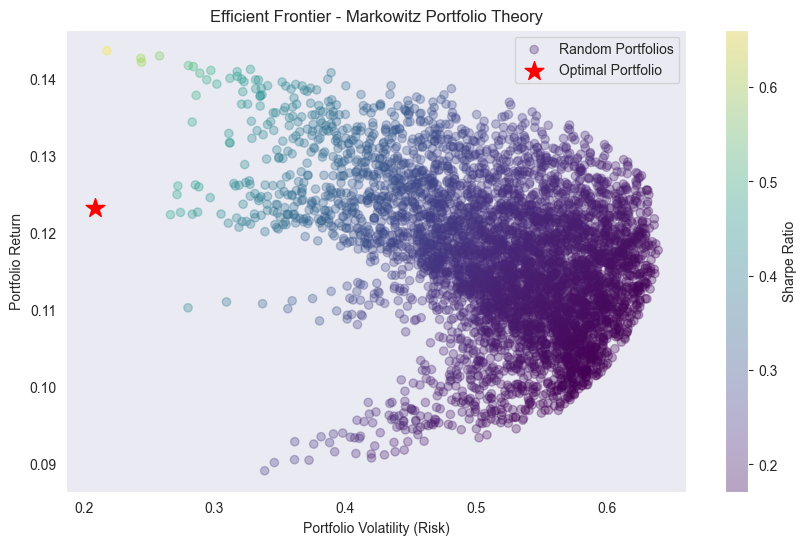

In [6]:
# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(random_volatilities, random_returns, c=random_returns / random_volatilities, cmap='viridis', marker='o', alpha=0.3, label="Random Portfolios")
plt.colorbar(label="Sharpe Ratio")
plt.scatter(opt_volatility, opt_return, c='red', marker='*', s=200, label="Optimal Portfolio")
plt.xlabel("Portfolio Volatility (Risk)")
plt.ylabel("Portfolio Return")
plt.title("Efficient Frontier - Markowitz Portfolio Theory")
plt.legend()
plt.grid()
plt.show()

### Monte Carlo Simulation of Stock Prices

Monte Carlo simulation is a statistical technique used to model the probability of different outcomes in a process that cannot be easily predicted due to the intervention of random variables. In finance, Monte Carlo simulations are used to model the uncertainty in stock prices, option pricing, and risk management.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for Monte Carlo Simulation
initial_price = 100  # Initial stock price
mu = 0.05  # Expected return (drift)
sigma = 0.2  # Volatility (standard deviation of returns)
time_horizon = 252  # Number of trading days (1 year)
num_simulations = 1000  # Number of Monte Carlo paths



In [9]:
# Simulate daily returns using Geometric Brownian Motion (GBM)
dt = 1 / time_horizon  # Time step
random_shocks = np.random.normal(0, 1, (time_horizon, num_simulations))  # Standard normal shocks
price_paths = np.zeros((time_horizon, num_simulations))  # Store price paths
price_paths[0] = initial_price

# Generate price paths
for t in range(1, time_horizon):
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * random_shocks[t])

# Compute value at risk (VaR) at 95% confidence level
final_prices = price_paths[-1]
var_95 = np.percentile(final_prices, 5)  # 5th percentile

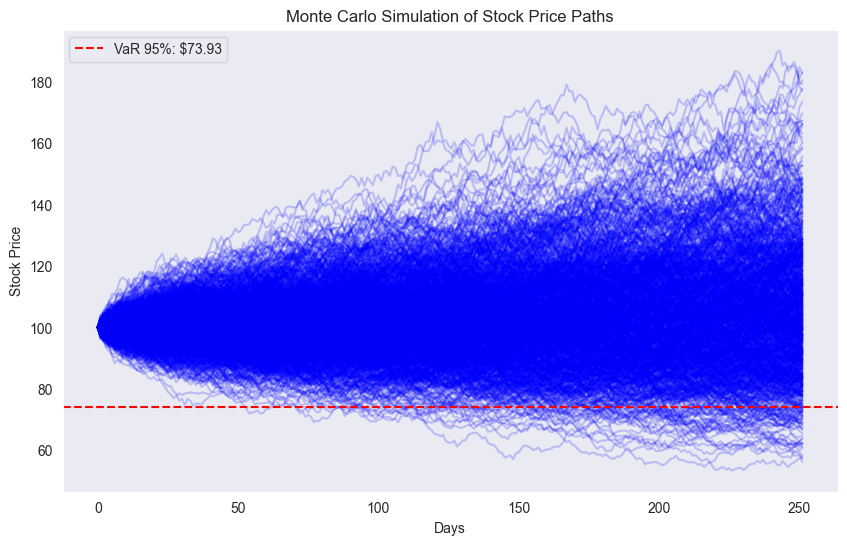

In [10]:
# Plot simulated price paths
plt.figure(figsize=(10, 6))
plt.plot(price_paths, alpha=0.2, color="blue")
plt.axhline(y=var_95, color="red", linestyle="--", label=f"VaR 95%: ${var_95:.2f}")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Monte Carlo Simulation of Stock Price Paths")
plt.legend()
plt.grid()
plt.show()